This notebook shows the example of the main working procedures of the DRAid framework.

It is analogues to the `draid` command, i.e. the `__main__.py` script, although there are still some difference.

Configure the required information. In particular, the `service` must be a valid SPARQL endpoint containing provenance in a supported scheme.

In [1]:
import draid
from draid import main
from draid import setting  # the `setting` module is used to store configuration informations

service = 'http://127.0.0.1:3030/data'  # The SPARQL endpoint service URL
setting.SCHEME = 'SPROV'

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


If you want to use local rule database, call the corresponding functions in `rule_database_helper`.

You may also want to change its database location through modifying the corresponding `setting` entries: `RULE_DB` and `DB_WRITE_TO` (see the setting module source code for detailed explanation). Or you can keep the default values, so your custom rules are read from `rule-db.json`, and the reasoning results will be discarded after finishing.

In [2]:
from draid import rule_database_helper as rdbh

# setting.RULE_DB = ['rule-db.json']
# setting.DB_WRITE_TO = True

rdbh.init_default()

Call the reasoner and obtain the results.

In [3]:
if setting.SCHEME == 'CWLPROV':
    results, activated_obligations = main.propagate_all_cwl(service)
elif setting.SCHEME == 'SPROV':
    results, activated_obligations = main.propagate_all_sprov(service)
else:
    raise RuntimeError('Unsupported scheme')

Finished Initialization
<write_transformed_graph> Not implemented yet


Visualise the results.

Display the last result (which is typically the only result) into the notebook as a demonstration.

This is almost the same as the `draw()` function in the `main` module, but modified slightly to better suit the notebook.

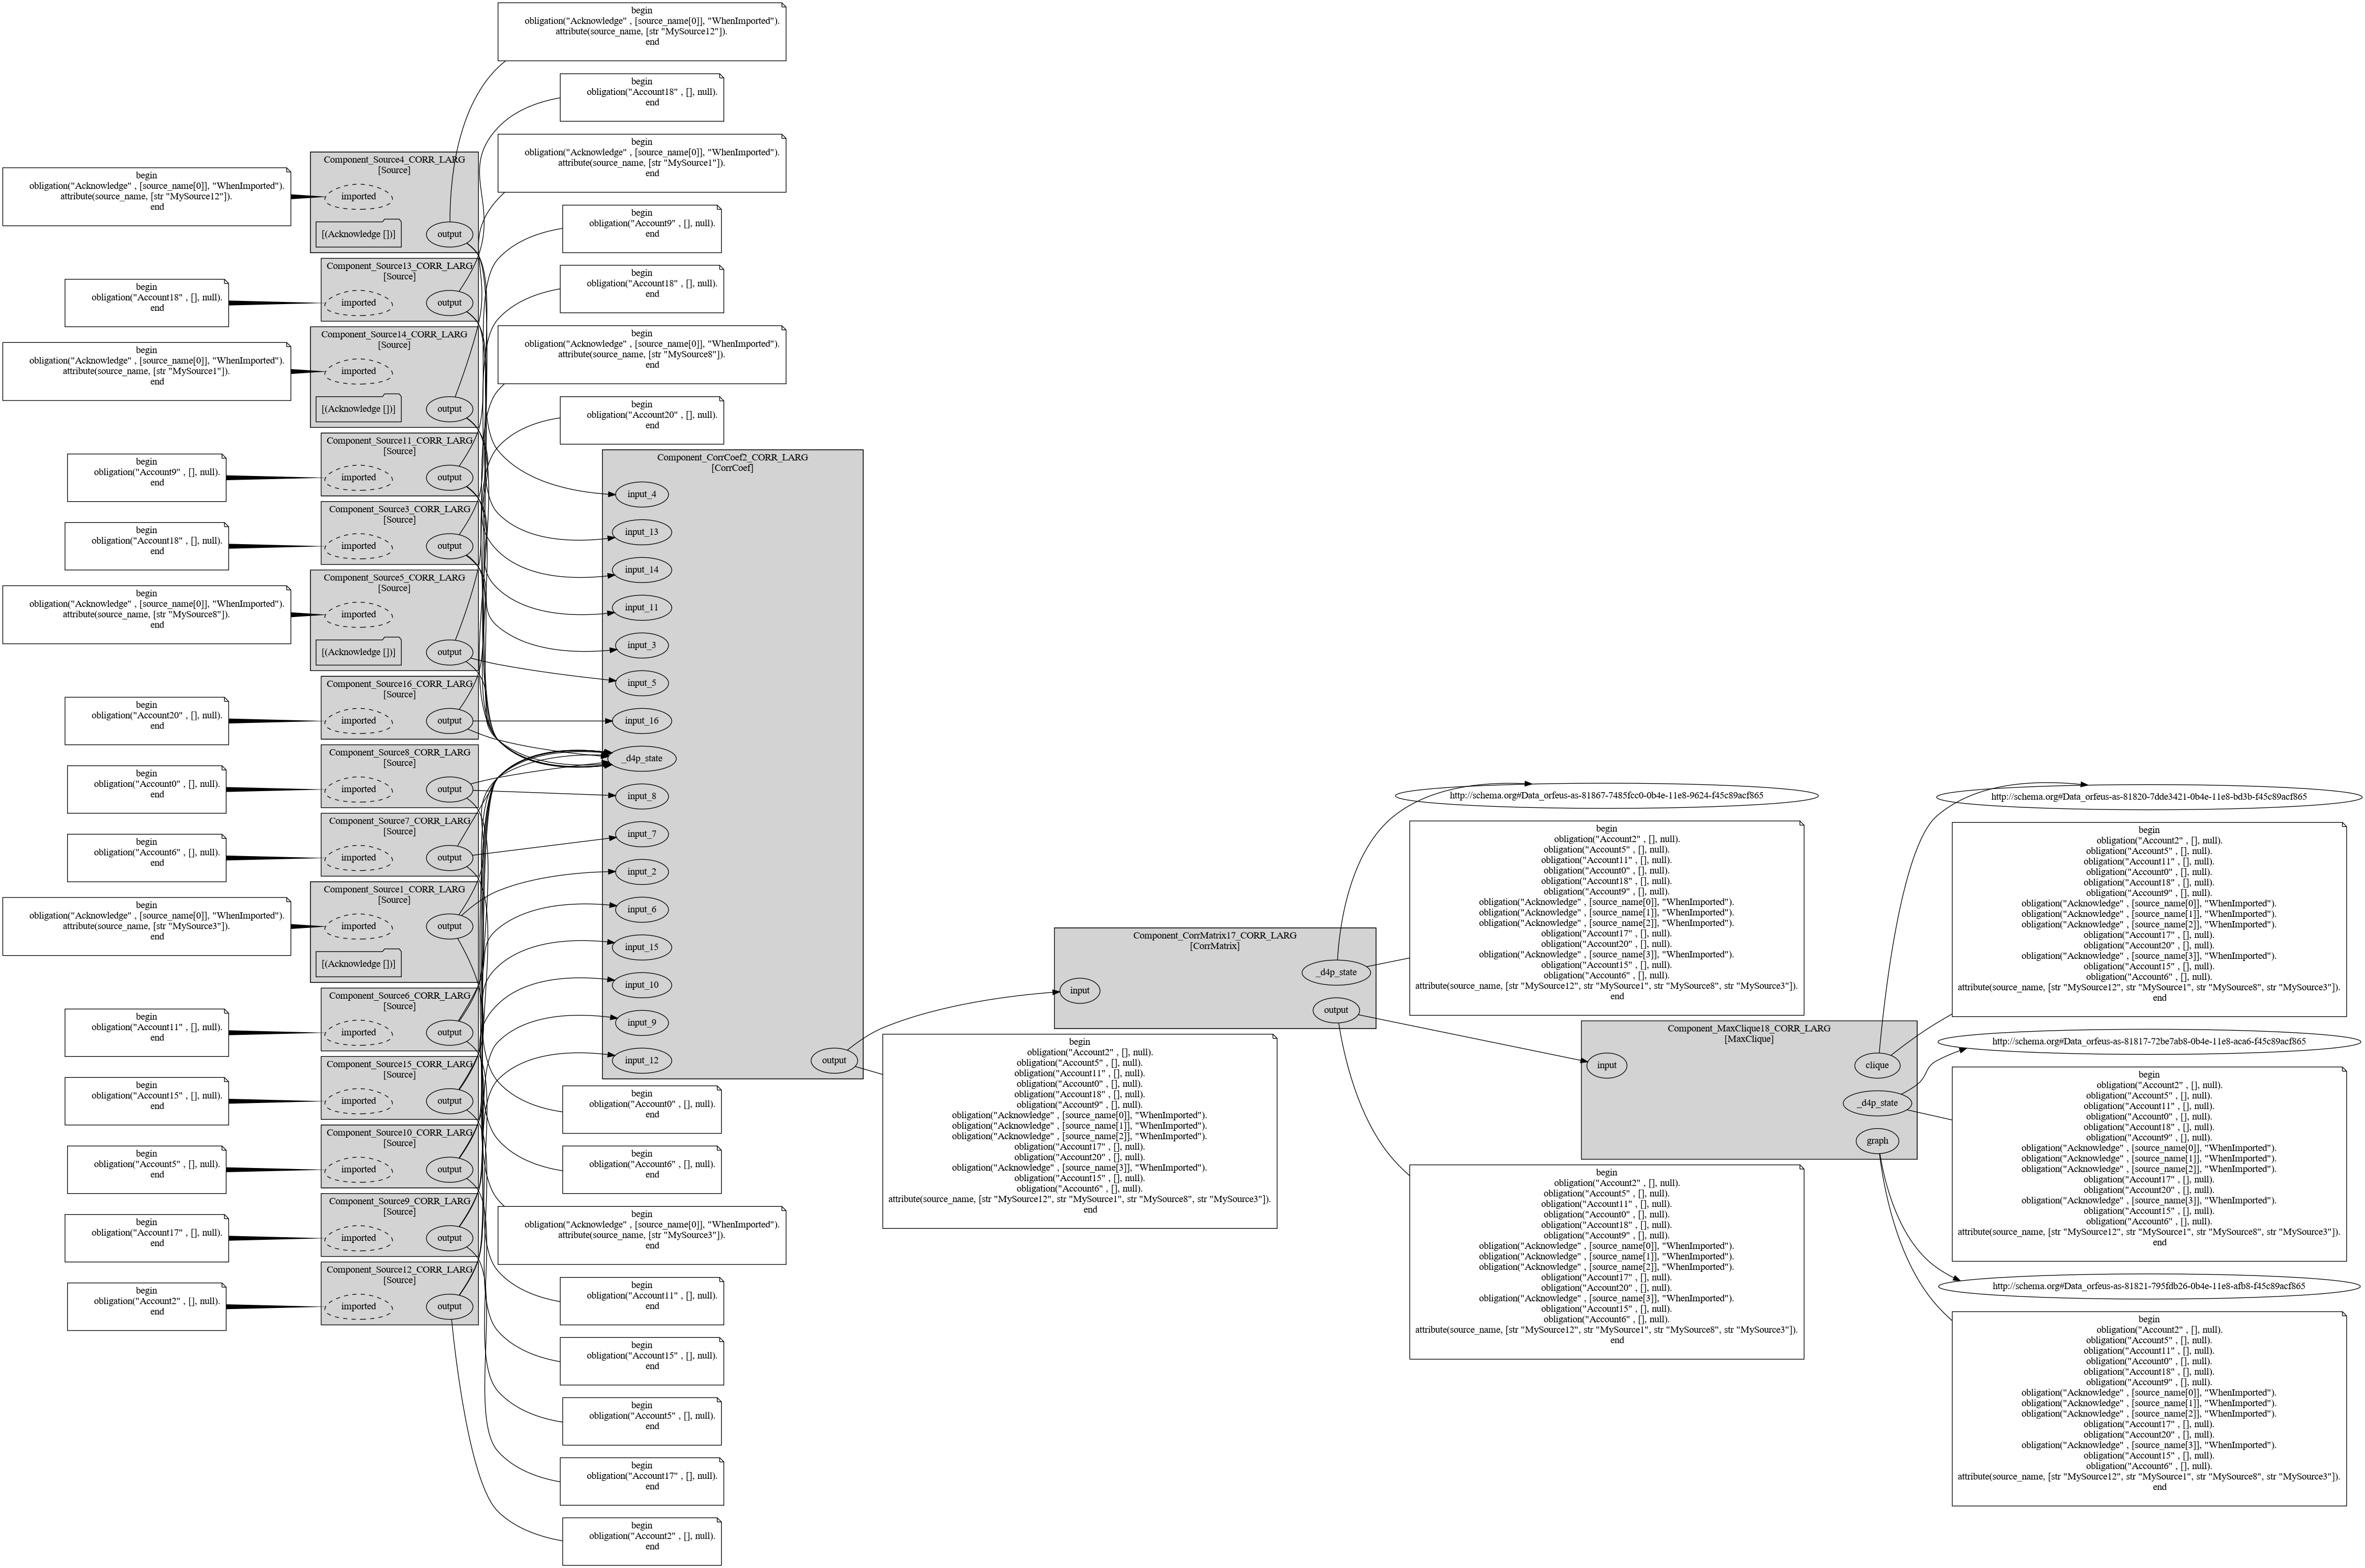

In [5]:
from IPython.display import Image
from draid import visualise as vis

for i, graph in enumerate(results):
    filename = "graph_{}.png".format(i)
    gb = vis.GraphBuilder(graph, activated_obligations[i]) \
            .data_flow() \
            .rules() \
            .obligation() \
            .flow_rules()
    G = gb.build()
    vis.draw_to_file(G, filename)

    
# Display the result from the last graph
Image(filename=filename) 